<a href="https://colab.research.google.com/github/annefrancine/ML_2022-2023/blob/main/Normalisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Avant toute chose nous allons créer des jeux de données aléatoires ainsi que quelques fonctions de graphes qui nous aideront à mieux comprendre les effets des différentes techniques utilisées (ci-dessus).

In [1]:
# charger les packages

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Génération aléatoire de jeux de données

In [2]:
def plotDistribGraph(pdf):
    fig, a = plt.subplots(ncols=1, figsize=(16, 5))
    a.set_title("Distributions")
    for col in pdf.columns:
        sns.kdeplot(pdf[col], ax=a)
    plt.legend()
    plt.show()

def plotGraph(pdf, pscaled_df):
    fig, (a, b) = plt.subplots(ncols=2, figsize=(16, 5))
    a.set_title("Avant mise à l'echelle")
    for col in pdf.columns:
        sns.kdeplot(pdf[col], ax=a)
    b.set_title("Apres mise à l'echelle")
    for col in pdf.columns:
        sns.kdeplot(pscaled_df[col], ax=b)
    plt.legend()
    plt.show()

def plotGraphAll(pdf, pscaled1, pscaled2, pscaled3):
    fig, (a, b, c, d) = plt.subplots(ncols=4, figsize=(16, 5))
    a.set_title("Avant mise à l'echelle")
    for col in pdf.columns:
        sns.kdeplot(pdf[col], ax=a)
    b.set_title("RobustScaler")
    for col in pscaled1.columns:
        sns.kdeplot(pscaled1[col], ax=b)
    c.set_title("MinMaxScaler")
    for col in pscaled2.columns:
        sns.kdeplot(pscaled2[col], ax=c)
    d.set_title("StandardScaler")
    for col in pscaled3.columns:
        sns.kdeplot(pscaled3[col], ax=d)
    plt.legend()
    plt.show()

np.random.seed(1)
NBROWS = 5000
df = pd.DataFrame({
    'A': np.random.normal(0, 2, NBROWS),
    'B': np.random.normal(5, 3, NBROWS),
    'C': np.random.normal(-5, 5, NBROWS),
    'D': np.random.chisquare(8, NBROWS),
    'E': np.random.beta(8, 2, NBROWS) * 40,
    'F': np.random.normal(5, 3, NBROWS)
})

Dans ce code, hormis les fonctions de traces nous créons 6 jeux de données dans un seul DataFrame.

Regardons déjà à quoi ressemblent nos jeux de données :

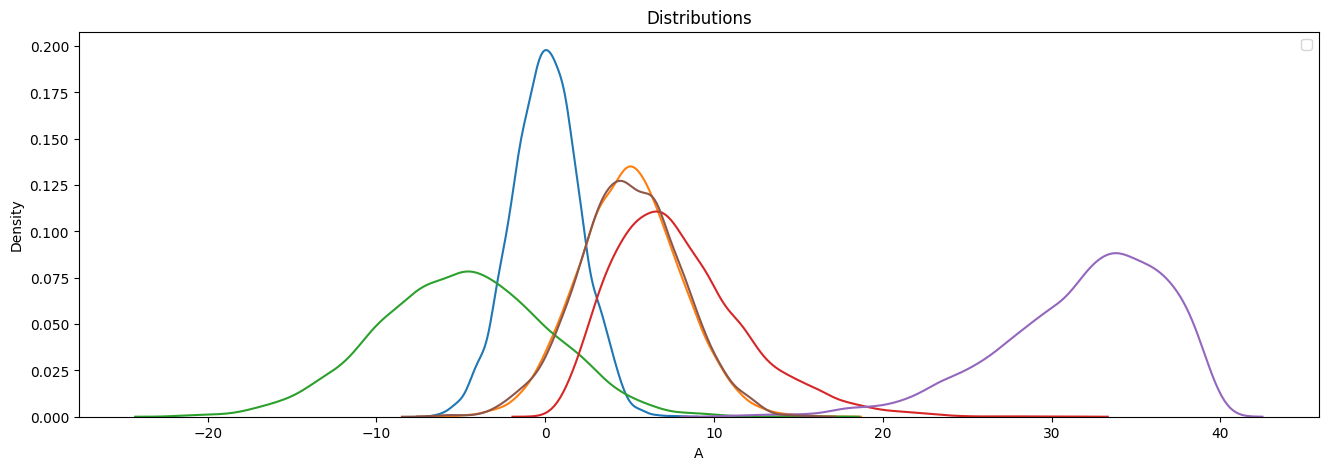

In [3]:
plotDistribGraph(df)

* A: blue
* b : orange
* c : vert
* d : rouge
* e : violet
* f : marron

Ces jeux de données sont basées sur des distributions gaussienne (A, B, C et F), X2 (D) et beta (E) (grâce aux fonctions Numpy np.random).

Ce code est réutilisable volontairement afin que vous puissiez faire varier les jeux de données et tester les techniques présentées.

## **Les techniques:**

En gros Scikit-Learn (sklearn.preprocessing) fournit plusieurs techniques de mise à l’échelle, nous allons en passer en revue 4:

* MaxAbsScaler
* MinMaxScaler
* StandardScaler
* RobustScaler

**1) MaxAbsScaler()**

Cette technique de mise à l’échelle est utile dés lors que la distribution de valeurs est éparses et que vous avez pas mal d’outiers. En effet les autres techniques auront tendance à effacer l’impact des outliers ce qui parfois est gênant. Elle est donc intéressante :

* Car robuste à de très petites déviations standard
* Elle préserve les entrées nulles sur une répartition de données éparses

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html

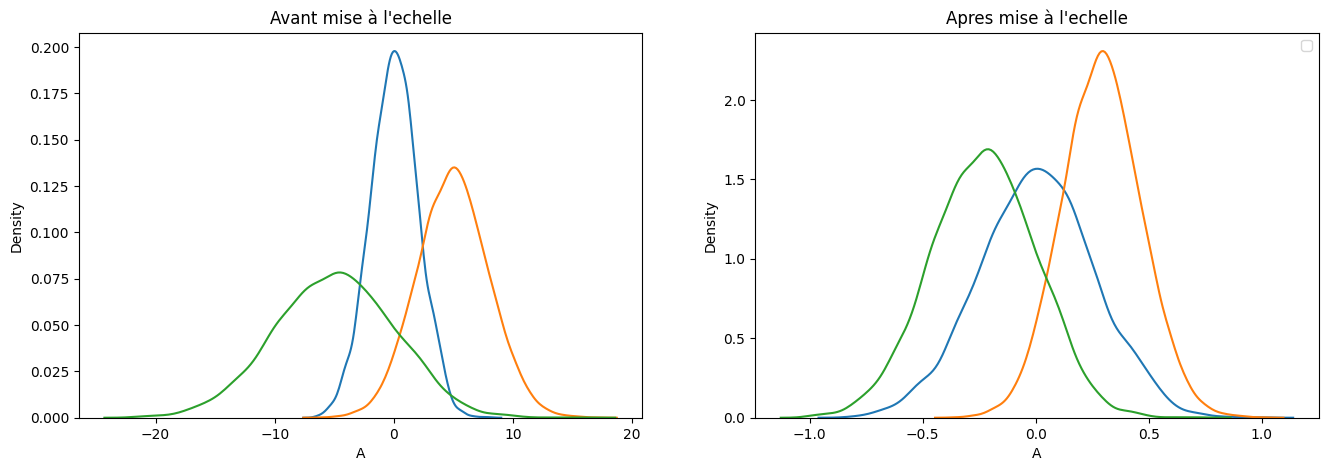

In [4]:
scaler = MaxAbsScaler()
keepCols = ['A', 'B', 'C']
scaled_df = scaler.fit_transform(df[keepCols])
scaled_df = pd.DataFrame(scaled_df, columns=keepCols)
plotGraph(df[keepCols], scaled_df)

* A : blue
* B : orange
* C: vert

**Pour résumer : cette technique se contente de rassembler les valeurs sur une plage de [-1, 1].**

2) MinMaxScaler():

Cette technique transforme les caractéristiques (xi) en adaptant chacune sur une plage donnée (par défaut [-1 .. 1]). Il est possible de changer cette plage via les parametres feature_range=(min, max). Pour faire simple voici la formule de transformation de chaque caractéristique :

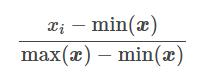



https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

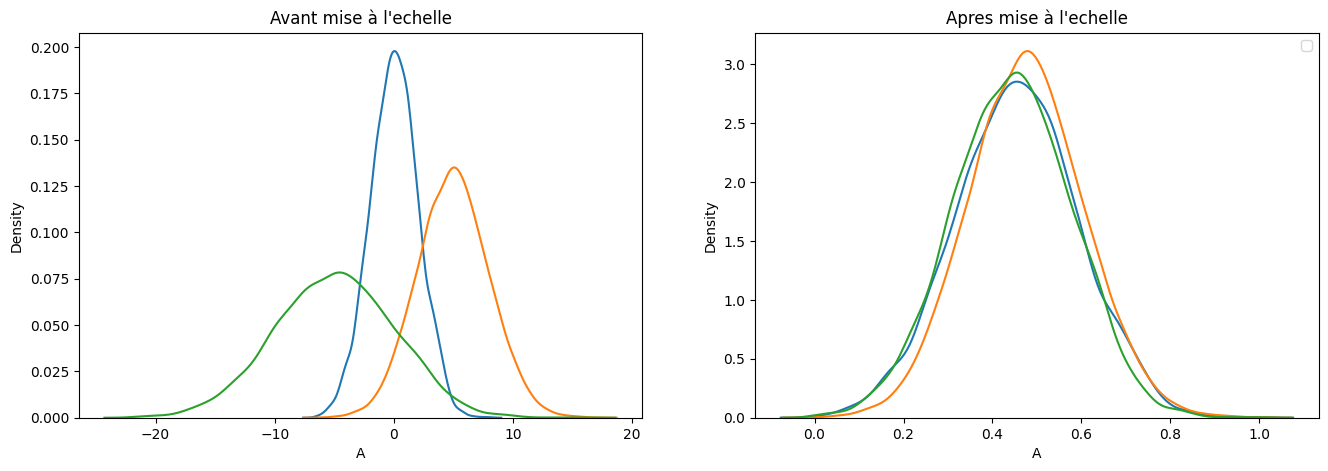

In [5]:
scaler = MinMaxScaler()
keepCols = ['A', 'B', 'C']
scaled_df = scaler.fit_transform(df[keepCols])
scaled_df = pd.DataFrame(scaled_df, columns=keepCols)
plotGraph(df[keepCols], scaled_df)

Si cette technique est probablement la plus connue elle fonctionne surtout bien pour les cas où la distribution n’est pas gaussienne

**3) RobustScaler()**

La technique  RobustScaler() utilise utilise le même principe de mise à l’échelle que MinMaxScaler(). Néanmoins, elle utilise l’intervalle interquartile au lieu du min-max, ce qui la rend plus fiable vis à vis des outliers. Voici la formule de re-travail des caractéristiques :

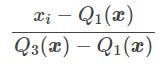

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

* Q1(x) : 1er quantile / 25%

* Q3(x) : 3ème quantile / 75%

Voyons là à l’œuvre :

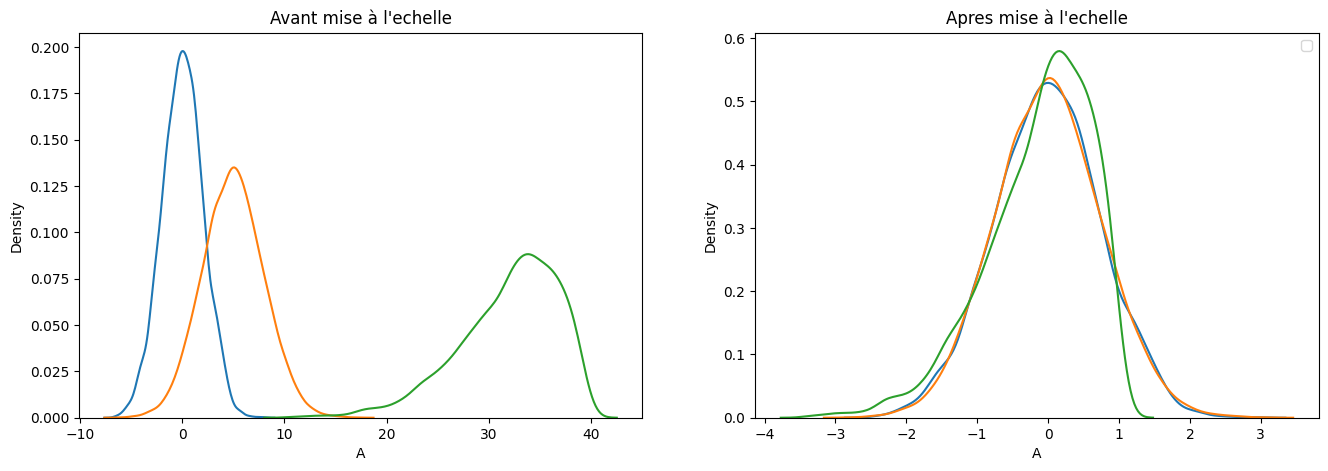

In [6]:
scaler = RobustScaler()
keepCols = ['A', 'B', 'E']
scaled_df = scaler.fit_transform(df[keepCols])
scaled_df = pd.DataFrame(scaled_df, columns=keepCols)
plotGraph(df[keepCols], scaled_df)

**4) StandardScaler() :**

Nous finirons notre petit tour (non exhaustif) des techniques de mise à l’échelle par sans doute la moins risquée : StandardScaler().

Cette technique part du principe que les données sont normalement distribuées. La fonction va recalculer chaque caractéristiques (Cf. formule ci-dessous) afin que les données soient centré autour de 0 et avec un [itg-glossary href= »http://www.datacorner.fr/glossary/ecart-type/ » glossary-id= »15640″]Ecart-Type[/itg-glossary] de 1.

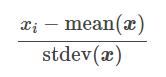

* mean(x) : Moyenne

* stdev(x) : « Standard Deviation » en Anglais signifie Ecart-Type

Voyons là à l’œuvre :

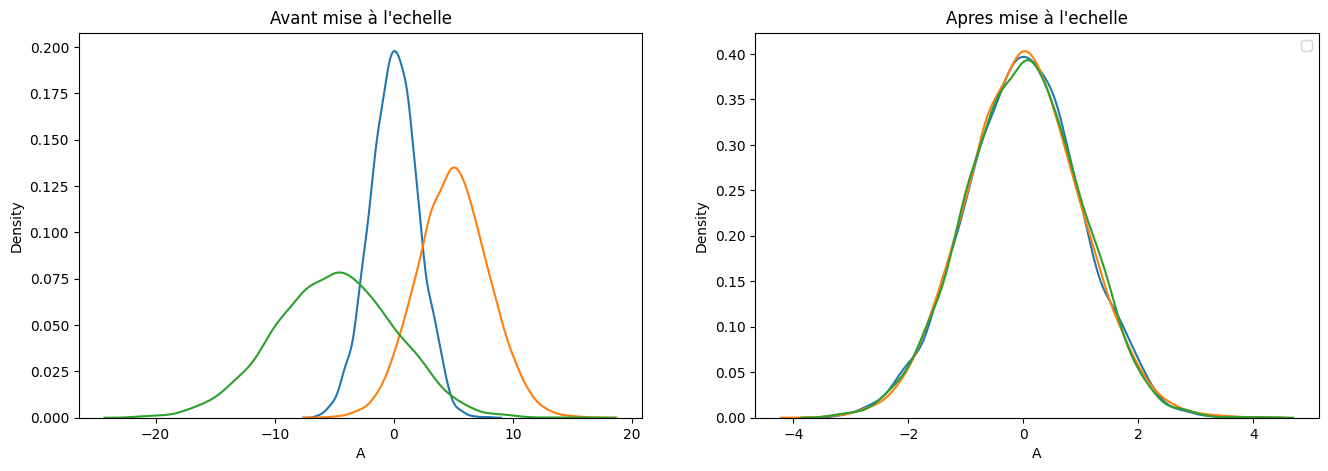

In [7]:
scaler = StandardScaler()
keepCols = ['A', 'B', 'C']
scaled_df = scaler.fit_transform(df[keepCols])
scaled_df = pd.DataFrame(scaled_df, columns=keepCols)
plotGraph(df[keepCols], scaled_df)

## **A retenir**

Résumons simplement les techniques de Feature Scaling que nous venons de rencontrer:

* **MaxAbsScaler** : a utiliser quand les données ne sont pas en répartition normale. Tient compte des outliers.
* **MinMaxScaler** : calibre les données sur une plage de valeurs.
* **StandardScaler **: recalibre les données pour des répartitions normales.
* **RobustScaler** : identique à Min-Max mais utilise l’intervalle interquartile au lieu des valeurs Min et Max.